In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, precision_score, f1_score, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [31]:
df = pd.read_excel('all_tables.xlsx')

In [32]:
df_1 = df[['product_id','transaction_qty','unit_price','store_id','temperature','rainfall','weather_description','Holiday Name','sales','profit']]

In [33]:
df_1['Holiday Name'] = df_1['Holiday Name'].fillna('None')

/var/folders/59/04rfykkd6m96gklk1909pqyh0000gn/T/ipykernel_7622/1021538408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Holiday Name'] = df_1['Holiday Name'].fillna('None')


In [34]:
# df.weather_description.value_counts()
df_1 = pd.get_dummies(df_1, columns=['weather_description'])
df_1['holiday'] = df_1['Holiday Name'].apply(lambda x: 1 if x != 'None' else 0)
df_1 = df_1.drop(columns=['Holiday Name',])

In [35]:
df_1.columns

Index(['product_id', 'transaction_qty', 'unit_price', 'store_id',
       'temperature', 'rainfall', 'sales', 'profit',
       'weather_description_Clear', 'weather_description_Cloudy',
       'weather_description_Heavy Rain', 'weather_description_Light Rain',
       'weather_description_Snow', 'holiday'],
      dtype='object')

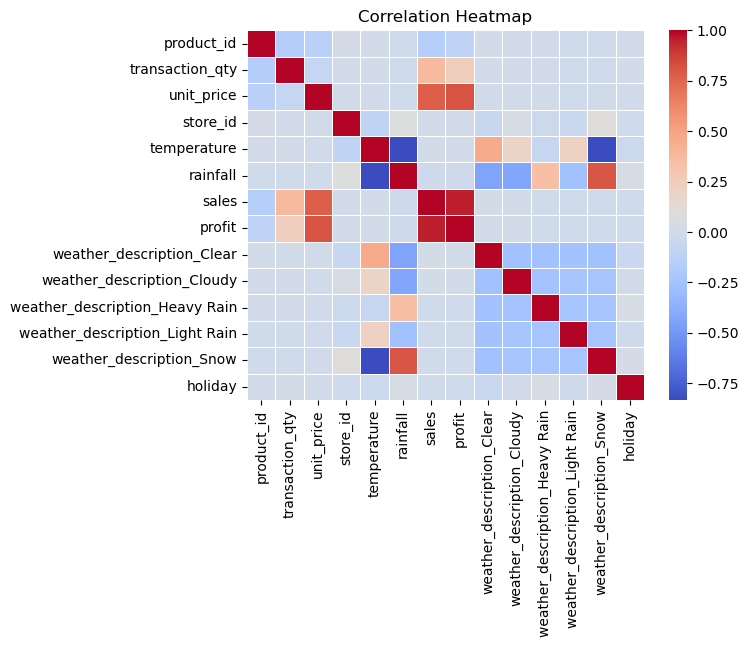

In [36]:
corr_matrix = df_1.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
y = df_1['profit']
X = df_1[['product_id', 'transaction_qty', 'unit_price', 'store_id',
       'temperature', 'rainfall', 
       'weather_description_Clear', 'weather_description_Cloudy',
       'weather_description_Heavy Rain', 'weather_description_Light Rain',
       'weather_description_Snow', 'holiday']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Fit and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f'Mean Squared Error for {name}: {mse}')

# Optional: Visualize model performance
plt.bar(results.keys(), results.values())
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()

Mean Squared Error for Linear Regression: 2.5416458219397575
Mean Squared Error for Ridge Regression: 2.541644018930193
Mean Squared Error for Random Forest: 0.08148120291575056
